### Exploring dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv('train.csv')
data.head(10)

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0
5,ISIC_0074311,IP_2950485,female,40.0,lower extremity,unknown,benign,0
6,ISIC_0074542,IP_4698288,male,25.0,lower extremity,unknown,benign,0
7,ISIC_0075663,IP_6017204,female,35.0,torso,unknown,benign,0
8,ISIC_0075914,IP_7622888,male,30.0,torso,unknown,benign,0
9,ISIC_0076262,IP_5075533,female,50.0,lower extremity,unknown,benign,0


In [3]:
data_test = pd.read_csv('test.csv')
data_test.head(10)

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge
0,ISIC_0052060,IP_3579794,male,70.0,NaN
1,ISIC_0052349,IP_7782715,male,40.0,lower extremity
2,ISIC_0058510,IP_7960270,female,55.0,torso
3,ISIC_0073313,IP_6375035,female,50.0,torso
4,ISIC_0073502,IP_0589375,female,45.0,lower extremity
5,ISIC_0074618,IP_4438996,male,50.0,lower extremity
6,ISIC_0076801,IP_3110660,male,45.0,upper extremity
7,ISIC_0077586,IP_8578442,male,50.0,lower extremity
8,ISIC_0082004,IP_0817448,female,45.0,torso
9,ISIC_0082785,IP_3634181,male,65.0,lower extremity


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33126 entries, 0 to 33125
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   image_name                     33126 non-null  object 
 1   patient_id                     33126 non-null  object 
 2   sex                            33061 non-null  object 
 3   age_approx                     33058 non-null  float64
 4   anatom_site_general_challenge  32599 non-null  object 
 5   diagnosis                      33126 non-null  object 
 6   benign_malignant               33126 non-null  object 
 7   target                         33126 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 2.0+ MB


In [5]:
data.loc[data.target == 1]

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
91,ISIC_0149568,IP_0962375,female,55.0,upper extremity,melanoma,malignant,1
235,ISIC_0188432,IP_0135517,female,50.0,upper extremity,melanoma,malignant,1
314,ISIC_0207268,IP_7735373,male,55.0,torso,melanoma,malignant,1
399,ISIC_0232101,IP_8349964,male,65.0,torso,melanoma,malignant,1
459,ISIC_0247330,IP_3232631,female,65.0,lower extremity,melanoma,malignant,1
...,...,...,...,...,...,...,...,...
32969,ISIC_9955163,IP_7507212,male,55.0,upper extremity,melanoma,malignant,1
33000,ISIC_9963177,IP_1165806,male,70.0,torso,melanoma,malignant,1
33014,ISIC_9967383,IP_7887363,male,60.0,upper extremity,melanoma,malignant,1
33050,ISIC_9978107,IP_2860540,male,65.0,lower extremity,melanoma,malignant,1


In [6]:
data.loc[data.diagnosis == 'melanoma']

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
91,ISIC_0149568,IP_0962375,female,55.0,upper extremity,melanoma,malignant,1
235,ISIC_0188432,IP_0135517,female,50.0,upper extremity,melanoma,malignant,1
314,ISIC_0207268,IP_7735373,male,55.0,torso,melanoma,malignant,1
399,ISIC_0232101,IP_8349964,male,65.0,torso,melanoma,malignant,1
459,ISIC_0247330,IP_3232631,female,65.0,lower extremity,melanoma,malignant,1
...,...,...,...,...,...,...,...,...
32969,ISIC_9955163,IP_7507212,male,55.0,upper extremity,melanoma,malignant,1
33000,ISIC_9963177,IP_1165806,male,70.0,torso,melanoma,malignant,1
33014,ISIC_9967383,IP_7887363,male,60.0,upper extremity,melanoma,malignant,1
33050,ISIC_9978107,IP_2860540,male,65.0,lower extremity,melanoma,malignant,1


### Plotting distribution of malignant-benign by age, gender etc.

In [7]:
malignant = data[data.benign_malignant == 'malignant']
median_mal_age = malignant['age_approx'].median()

benign = data[data.benign_malignant == 'benign']
median_ben_age = malignant['age_approx'].median()

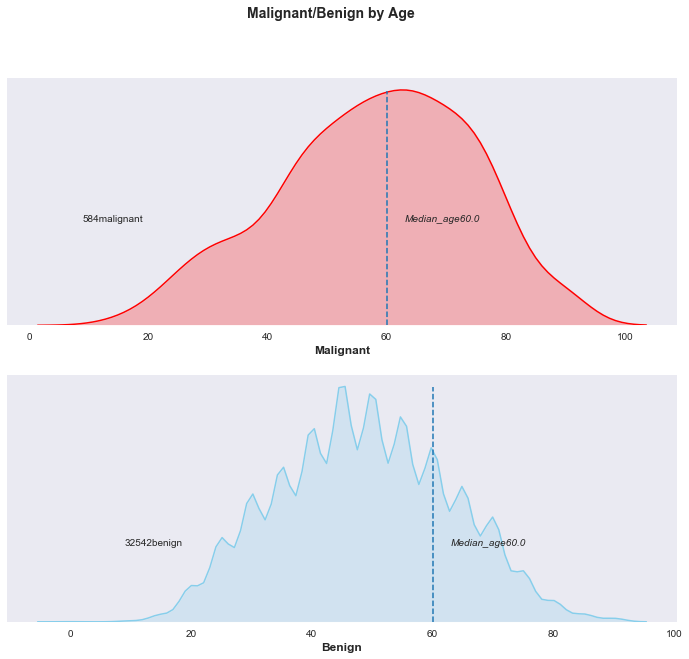

In [8]:
sns.set_style('dark')
fig, axes = plt.subplots(2, 1, figsize = (12, 10))

sns.distplot(malignant['age_approx'], color = 'r', kde_kws = {'shade': True}, hist = False, ax = axes[0])
axes[0].axvline(median_mal_age, ymax = 0.95, linestyle = '--')
axes[0].text(median_mal_age + 3, 0.01, 'Median_age' + str(median_mal_age), fontsize = 10, style = 'italic')
axes[0].text(9, 0.01, str(malignant.shape[0]) + 'malignant', fontsize = 10)
axes[0].set_yticks([])
axes[0].set_xlabel('Malignant', fontsize = 12, fontweight = 'semibold')

sns.distplot(benign['age_approx'], color = 'skyblue', kde_kws = {'shade': True}, hist = False, ax = axes[1])
axes[1].axvline(median_ben_age, ymax = 0.95, linestyle = '--')
axes[1].text(median_ben_age + 3, 0.01, 'Median_age' + str(median_ben_age), fontsize = 10, style = 'italic')
axes[1].text(9, 0.01, str(benign.shape[0]) + 'benign', fontsize = 10)
axes[1].set_yticks([])
axes[1].set_xlabel('Benign', fontsize = 12, fontweight = 'semibold')

sns.despine(left = True)
fig.suptitle('Malignant/Benign by Age', fontsize = 14, fontweight = 'semibold')
plt.show()

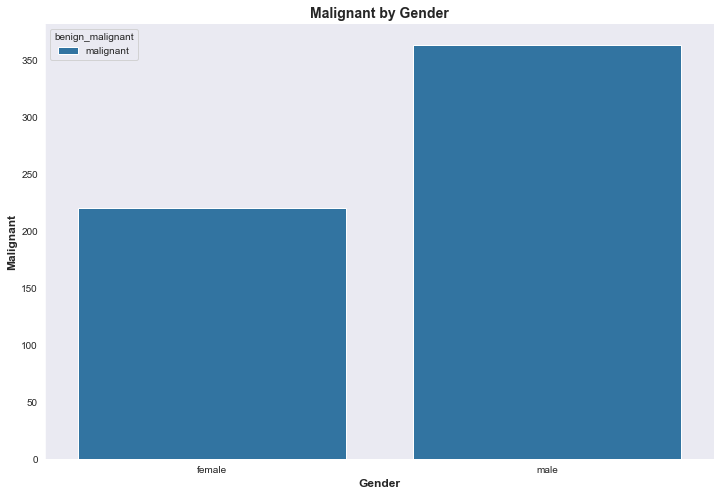

In [9]:
sns.set_style('dark')
plt.figure(figsize = (12, 8))

sns.countplot(x = 'sex', hue = 'benign_malignant', data = data[data['target'] == 1])
sns.despine()
plt.ylabel('Malignant', fontsize = 12, fontweight = 'semibold')
plt.xlabel('Gender', fontsize = 12, fontweight = 'semibold')
plt.title('Malignant by Gender', fontsize = 14, fontweight = 'semibold')
plt.show()

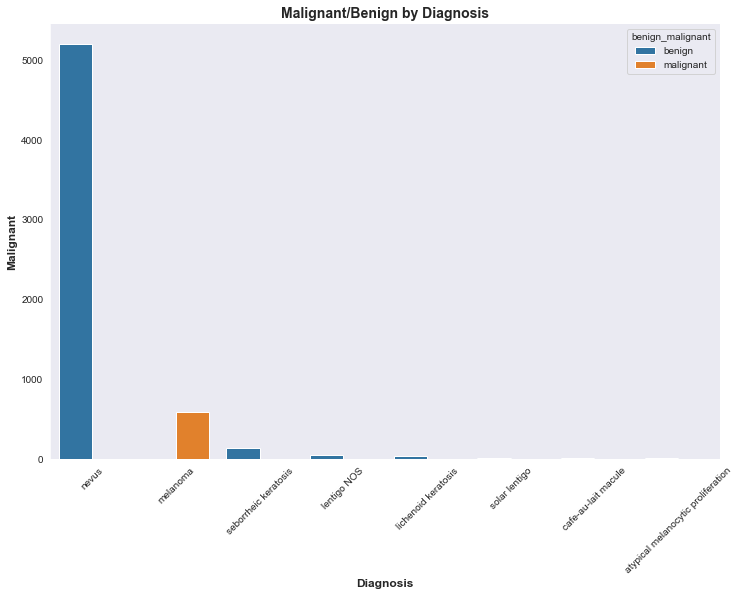

In [10]:
sns.set_style('dark')
plt.figure(figsize = (12, 8))

sns.countplot(x = 'diagnosis', hue = 'benign_malignant', data = data[data['diagnosis'] != 'unknown'])
sns.despine()
plt.ylabel('Malignant', fontsize = 12, fontweight = 'semibold')
plt.xlabel('Diagnosis', fontsize = 12, fontweight = 'semibold')
plt.xticks(rotation = 45)
plt.title('Malignant/Benign by Diagnosis', fontsize = 14, fontweight = 'semibold')
plt.show()

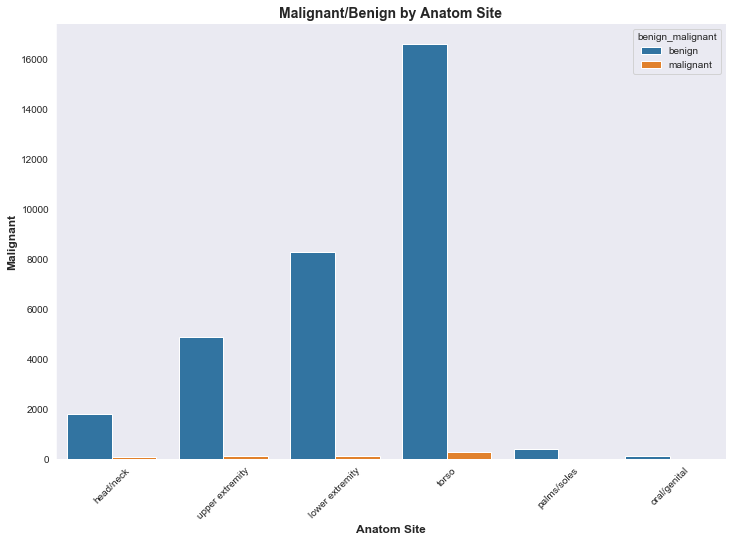

In [11]:
sns.set_style('dark')
plt.figure(figsize = (12, 8))

sns.countplot(x = 'anatom_site_general_challenge', hue = 'benign_malignant', data = data)
sns.despine()
plt.ylabel('Malignant', fontsize = 12, fontweight = 'semibold')
plt.xlabel('Anatom Site', fontsize = 12, fontweight = 'semibold')
plt.xticks(rotation = 45)
plt.title('Malignant/Benign by Anatom Site', fontsize = 14, fontweight = 'semibold')
plt.show()

### Separating data for training

In [14]:
from pathlib import Path
for i, file in enumerate(Path('train').glob('ISIC_*.jpg')):
    if data['target'][i] == 0:
        file.replace(Path('train/benign') / file.name)
    else:
        file.replace(Path('train/malignant') / file.name)

### CNN, datasets, dataloaders 

In [2]:
from PIL import Image
from PIL import ImageFile
import torch
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets
from glob import glob
from collections import OrderedDict

In [3]:
train_dir = 'train/'
valid_dir = 'valid/'

random_transforms = [transforms.RandomAffine(45), transforms.RandomHorizontalFlip(), transforms.RandomVerticalFlip()]
train_transforms = transforms.Compose([transforms.RandomRotation(90),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomChoice(random_transforms),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])
image_transforms = transforms.Compose([transforms.Resize(255),
                                       transforms.CenterCrop(224),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

In [6]:
batch_size = 256
num_workers = 0

train_dataset = datasets.ImageFolder(train_dir, transform = train_transforms)
valid_dataset = datasets.ImageFolder(valid_dir, transform = train_transforms)

trainloader = torch.utils.data.DataLoader(train_dataset, batch_size = batch_size, num_workers = num_workers, shuffle = True)
validloader = torch.utils.data.DataLoader(valid_dataset, batch_size = batch_size, num_workers = num_workers, shuffle = True)

loaders = {'train': trainloader, 'valid': validloader}

In [7]:
use_cuda = torch.cuda.is_available()
classifier = nn.Sequential(OrderedDict([('fc1', nn.Linear(512, 1024)),
                                        ('dropout1', nn.Dropout(p = 0.3)),
                                        ('relu1', nn.ReLU()),
                                        ('fc2', nn.Linear(1024, 256)),
                                        ('dropout2', nn.Dropout(p = 0.2)),
                                        ('relu2', nn.ReLU()),
                                        ('fc3', nn.Linear(256, 2)),
                                        ('softmax', nn.LogSoftmax(dim = 1))]))
model = models.resnet18(pretrained = True)
for param in model.parameters():
    param.requires_grad = False
model.fc = classifier
if use_cuda:
    print('GPU is available')
    model = model.cuda()
model

GPU is available


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [11]:
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.fc.parameters(), lr = 0.02, momentum = 0.85)

In [10]:
print(len(trainloader))
print(len(validloader))

124
6


In [7]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    control_dict = {}
    valid_loss_min = np.Inf
    for epoch in range(1, n_epochs + 1):
        train_loss = 0.0
        valid_loss = 0.0
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * data.size(0)
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            output = model(data)
            loss = criterion(output, target)
            valid_loss += loss.item() * data.size(0)
        train_loss = train_loss / len(loaders['train'])
        valid_loss = valid_loss / len(loaders['valid'])
        print(f'Epoch: {epoch}\tTraining loss: {train_loss}\tValidation loss: {valid_loss}')
        if valid_loss <= valid_loss_min:
            print(f'Validation loss decreased ({valid_loss_min} --> {valid_loss}). Saving model...')
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
        control_dict[epoch] = [train_loss, valid_loss]
    
    return model, control_dict

In [13]:
trained_model, visual_data = train(50, loaders, model, optimizer, criterion, use_cuda, 'resnet18_pretrained_no_grad.pt')

Batch number 0
Batch number 1
Batch number 2
Batch number 3
Batch number 4
Batch number 5
Batch number 6
Batch number 7
Batch number 8
Batch number 9
Batch number 10
Batch number 11
Batch number 12
Batch number 13
Batch number 14
Batch number 15
Batch number 16
Batch number 17
Batch number 18
Batch number 19
Batch number 20
Batch number 21
Batch number 22
Batch number 23
Batch number 24
Batch number 25
Batch number 26
Batch number 27
Batch number 28
Batch number 29
Batch number 30
Batch number 31
Batch number 32
Batch number 33
Batch number 34
Batch number 35
Batch number 36
Batch number 37
Batch number 38
Batch number 39
Batch number 40
Batch number 41
Batch number 42
Batch number 43
Batch number 44
Batch number 45
Batch number 46
Batch number 47
Batch number 48
Batch number 49
Batch number 50
Batch number 51
Batch number 52
Batch number 53
Batch number 54
Batch number 55
Batch number 56
Batch number 57
Batch number 58
Batch number 59
Batch number 60
Batch number 61
Batch number 62
Ba

Batch number 98
Batch number 99
Batch number 100
Batch number 101
Batch number 102
Batch number 103
Batch number 104
Batch number 105
Batch number 106
Batch number 107
Batch number 108
Batch number 109
Batch number 110
Batch number 111
Batch number 112
Batch number 113
Batch number 114
Batch number 115
Batch number 116
Batch number 117
Batch number 118
Batch number 119
Batch number 120
Batch number 121
Batch number 122
Batch number 123
Validation batch 0
Validation batch 1
Validation batch 2
Validation batch 3
Validation batch 4
Validation batch 5
Epoch: 4	Training loss: 19.466212271201996	Validation loss: 68.13263962666194
Validation loss decreased (71.13242368896802 --> 68.13263962666194). Saving model...
Batch number 0
Batch number 1
Batch number 2
Batch number 3
Batch number 4
Batch number 5
Batch number 6
Batch number 7
Batch number 8
Batch number 9
Batch number 10
Batch number 11
Batch number 12
Batch number 13
Batch number 14
Batch number 15
Batch number 16
Batch number 17
Batch

Batch number 47
Batch number 48
Batch number 49
Batch number 50
Batch number 51
Batch number 52
Batch number 53
Batch number 54
Batch number 55
Batch number 56
Batch number 57
Batch number 58
Batch number 59
Batch number 60
Batch number 61
Batch number 62
Batch number 63
Batch number 64
Batch number 65
Batch number 66
Batch number 67
Batch number 68
Batch number 69
Batch number 70
Batch number 71
Batch number 72
Batch number 73
Batch number 74
Batch number 75
Batch number 76
Batch number 77
Batch number 78
Batch number 79
Batch number 80
Batch number 81
Batch number 82
Batch number 83
Batch number 84
Batch number 85
Batch number 86
Batch number 87
Batch number 88
Batch number 89
Batch number 90
Batch number 91
Batch number 92
Batch number 93
Batch number 94
Batch number 95
Batch number 96
Batch number 97
Batch number 98
Batch number 99
Batch number 100
Batch number 101
Batch number 102
Batch number 103
Batch number 104
Batch number 105
Batch number 106
Batch number 107
Batch number 108

Batch number 6
Batch number 7
Batch number 8
Batch number 9
Batch number 10
Batch number 11
Batch number 12
Batch number 13
Batch number 14
Batch number 15
Batch number 16
Batch number 17
Batch number 18
Batch number 19
Batch number 20
Batch number 21
Batch number 22
Batch number 23
Batch number 24
Batch number 25
Batch number 26
Batch number 27
Batch number 28
Batch number 29
Batch number 30
Batch number 31
Batch number 32
Batch number 33
Batch number 34
Batch number 35
Batch number 36
Batch number 37
Batch number 38
Batch number 39
Batch number 40
Batch number 41
Batch number 42
Batch number 43
Batch number 44
Batch number 45
Batch number 46
Batch number 47
Batch number 48
Batch number 49
Batch number 50
Batch number 51
Batch number 52
Batch number 53
Batch number 54
Batch number 55
Batch number 56
Batch number 57
Batch number 58
Batch number 59
Batch number 60
Batch number 61
Batch number 62
Batch number 63
Batch number 64
Batch number 65
Batch number 66
Batch number 67
Batch number

Batch number 103
Batch number 104
Batch number 105
Batch number 106
Batch number 107
Batch number 108
Batch number 109
Batch number 110
Batch number 111
Batch number 112
Batch number 113
Batch number 114
Batch number 115
Batch number 116
Batch number 117
Batch number 118
Batch number 119
Batch number 120
Batch number 121
Batch number 122
Batch number 123
Validation batch 0
Validation batch 1
Validation batch 2
Validation batch 3
Validation batch 4
Validation batch 5
Epoch: 15	Training loss: 18.86924524941752	Validation loss: 62.01754300793012
Batch number 0
Batch number 1
Batch number 2
Batch number 3
Batch number 4
Batch number 5
Batch number 6
Batch number 7
Batch number 8
Batch number 9
Batch number 10
Batch number 11
Batch number 12
Batch number 13
Batch number 14
Batch number 15
Batch number 16
Batch number 17
Batch number 18
Batch number 19
Batch number 20
Batch number 21
Batch number 22
Batch number 23
Batch number 24
Batch number 25
Batch number 26
Batch number 27
Batch number 

Batch number 68
Batch number 69
Batch number 70
Batch number 71
Batch number 72
Batch number 73
Batch number 74
Batch number 75
Batch number 76
Batch number 77
Batch number 78
Batch number 79
Batch number 80
Batch number 81
Batch number 82
Batch number 83
Batch number 84
Batch number 85
Batch number 86
Batch number 87
Batch number 88
Batch number 89
Batch number 90
Batch number 91
Batch number 92
Batch number 93
Batch number 94
Batch number 95
Batch number 96
Batch number 97
Batch number 98
Batch number 99
Batch number 100
Batch number 101
Batch number 102
Batch number 103
Batch number 104
Batch number 105
Batch number 106
Batch number 107
Batch number 108
Batch number 109
Batch number 110
Batch number 111
Batch number 112
Batch number 113
Batch number 114
Batch number 115
Batch number 116
Batch number 117
Batch number 118
Batch number 119
Batch number 120
Batch number 121
Batch number 122
Batch number 123
Validation batch 0
Validation batch 1
Validation batch 2
Validation batch 3
Vali

Batch number 22
Batch number 23
Batch number 24
Batch number 25
Batch number 26
Batch number 27
Batch number 28
Batch number 29
Batch number 30
Batch number 31
Batch number 32
Batch number 33
Batch number 34
Batch number 35
Batch number 36
Batch number 37
Batch number 38
Batch number 39
Batch number 40
Batch number 41
Batch number 42
Batch number 43
Batch number 44
Batch number 45
Batch number 46
Batch number 47
Batch number 48
Batch number 49
Batch number 50
Batch number 51
Batch number 52
Batch number 53
Batch number 54
Batch number 55
Batch number 56
Batch number 57
Batch number 58
Batch number 59
Batch number 60
Batch number 61
Batch number 62
Batch number 63
Batch number 64
Batch number 65
Batch number 66
Batch number 67
Batch number 68
Batch number 69
Batch number 70
Batch number 71
Batch number 72
Batch number 73
Batch number 74
Batch number 75
Batch number 76
Batch number 77
Batch number 78
Batch number 79
Batch number 80
Batch number 81
Batch number 82
Batch number 83
Batch nu

Batch number 123
Validation batch 0
Validation batch 1
Validation batch 2
Validation batch 3
Validation batch 4
Validation batch 5
Epoch: 26	Training loss: 18.45806467977743	Validation loss: 60.313807651400566
Batch number 0
Batch number 1
Batch number 2
Batch number 3
Batch number 4
Batch number 5
Batch number 6
Batch number 7
Batch number 8
Batch number 9
Batch number 10
Batch number 11
Batch number 12
Batch number 13
Batch number 14
Batch number 15
Batch number 16
Batch number 17
Batch number 18
Batch number 19
Batch number 20
Batch number 21
Batch number 22
Batch number 23
Batch number 24
Batch number 25
Batch number 26
Batch number 27
Batch number 28
Batch number 29
Batch number 30
Batch number 31
Batch number 32
Batch number 33
Batch number 34
Batch number 35
Batch number 36
Batch number 37
Batch number 38
Batch number 39
Batch number 40
Batch number 41
Batch number 42
Batch number 43
Batch number 44
Batch number 45
Batch number 46
Batch number 47
Batch number 48
Batch number 49


Batch number 89
Batch number 90
Batch number 91
Batch number 92
Batch number 93
Batch number 94
Batch number 95
Batch number 96
Batch number 97
Batch number 98
Batch number 99
Batch number 100
Batch number 101
Batch number 102
Batch number 103
Batch number 104
Batch number 105
Batch number 106
Batch number 107
Batch number 108
Batch number 109
Batch number 110
Batch number 111
Batch number 112
Batch number 113
Batch number 114
Batch number 115
Batch number 116
Batch number 117
Batch number 118
Batch number 119
Batch number 120
Batch number 121
Batch number 122
Batch number 123
Validation batch 0
Validation batch 1
Validation batch 2
Validation batch 3
Validation batch 4
Validation batch 5
Epoch: 30	Training loss: 18.586195930838585	Validation loss: 62.14900481700897
Batch number 0
Batch number 1
Batch number 2
Batch number 3
Batch number 4
Batch number 5
Batch number 6
Batch number 7
Batch number 8
Batch number 9
Batch number 10
Batch number 11
Batch number 12
Batch number 13
Batch num

Batch number 54
Batch number 55
Batch number 56
Batch number 57
Batch number 58
Batch number 59
Batch number 60
Batch number 61
Batch number 62
Batch number 63
Batch number 64
Batch number 65
Batch number 66
Batch number 67
Batch number 68
Batch number 69
Batch number 70
Batch number 71
Batch number 72
Batch number 73
Batch number 74
Batch number 75
Batch number 76
Batch number 77
Batch number 78
Batch number 79
Batch number 80
Batch number 81
Batch number 82
Batch number 83
Batch number 84
Batch number 85
Batch number 86
Batch number 87
Batch number 88
Batch number 89
Batch number 90
Batch number 91
Batch number 92
Batch number 93
Batch number 94
Batch number 95
Batch number 96
Batch number 97
Batch number 98
Batch number 99
Batch number 100
Batch number 101
Batch number 102
Batch number 103
Batch number 104
Batch number 105
Batch number 106
Batch number 107
Batch number 108
Batch number 109
Batch number 110
Batch number 111
Batch number 112
Batch number 113
Batch number 114
Batch num

Batch number 19
Batch number 20
Batch number 21
Batch number 22
Batch number 23
Batch number 24
Batch number 25
Batch number 26
Batch number 27
Batch number 28
Batch number 29
Batch number 30
Batch number 31
Batch number 32
Batch number 33
Batch number 34
Batch number 35
Batch number 36
Batch number 37
Batch number 38
Batch number 39
Batch number 40
Batch number 41
Batch number 42
Batch number 43
Batch number 44
Batch number 45
Batch number 46
Batch number 47
Batch number 48
Batch number 49
Batch number 50
Batch number 51
Batch number 52
Batch number 53
Batch number 54
Batch number 55
Batch number 56
Batch number 57
Batch number 58
Batch number 59
Batch number 60
Batch number 61
Batch number 62
Batch number 63
Batch number 64
Batch number 65
Batch number 66
Batch number 67
Batch number 68
Batch number 69
Batch number 70
Batch number 71
Batch number 72
Batch number 73
Batch number 74
Batch number 75
Batch number 76
Batch number 77
Batch number 78
Batch number 79
Batch number 80
Batch nu

Batch number 120
Batch number 121
Batch number 122
Batch number 123
Validation batch 0
Validation batch 1
Validation batch 2
Validation batch 3
Validation batch 4
Validation batch 5
Epoch: 41	Training loss: 18.30904527633421	Validation loss: 63.265282317996025
Batch number 0
Batch number 1
Batch number 2
Batch number 3
Batch number 4
Batch number 5
Batch number 6
Batch number 7
Batch number 8
Batch number 9
Batch number 10
Batch number 11
Batch number 12
Batch number 13
Batch number 14
Batch number 15
Batch number 16
Batch number 17
Batch number 18
Batch number 19
Batch number 20
Batch number 21
Batch number 22
Batch number 23
Batch number 24
Batch number 25
Batch number 26
Batch number 27
Batch number 28
Batch number 29
Batch number 30
Batch number 31
Batch number 32
Batch number 33
Batch number 34
Batch number 35
Batch number 36
Batch number 37
Batch number 38
Batch number 39
Batch number 40
Batch number 41
Batch number 42
Batch number 43
Batch number 44
Batch number 45
Batch number 

Batch number 86
Batch number 87
Batch number 88
Batch number 89
Batch number 90
Batch number 91
Batch number 92
Batch number 93
Batch number 94
Batch number 95
Batch number 96
Batch number 97
Batch number 98
Batch number 99
Batch number 100
Batch number 101
Batch number 102
Batch number 103
Batch number 104
Batch number 105
Batch number 106
Batch number 107
Batch number 108
Batch number 109
Batch number 110
Batch number 111
Batch number 112
Batch number 113
Batch number 114
Batch number 115
Batch number 116
Batch number 117
Batch number 118
Batch number 119
Batch number 120
Batch number 121
Batch number 122
Batch number 123
Validation batch 0
Validation batch 1
Validation batch 2
Validation batch 3
Validation batch 4
Validation batch 5
Epoch: 45	Training loss: 18.320636293820797	Validation loss: 63.950093438227974
Batch number 0
Batch number 1
Batch number 2
Batch number 3
Batch number 4
Batch number 5
Batch number 6
Batch number 7
Batch number 8
Batch number 9
Batch number 10
Batch nu

Batch number 51
Batch number 52
Batch number 53
Batch number 54
Batch number 55
Batch number 56
Batch number 57
Batch number 58
Batch number 59
Batch number 60
Batch number 61
Batch number 62
Batch number 63
Batch number 64
Batch number 65
Batch number 66
Batch number 67
Batch number 68
Batch number 69
Batch number 70
Batch number 71
Batch number 72
Batch number 73
Batch number 74
Batch number 75
Batch number 76
Batch number 77
Batch number 78
Batch number 79
Batch number 80
Batch number 81
Batch number 82
Batch number 83
Batch number 84
Batch number 85
Batch number 86
Batch number 87
Batch number 88
Batch number 89
Batch number 90
Batch number 91
Batch number 92
Batch number 93
Batch number 94
Batch number 95
Batch number 96
Batch number 97
Batch number 98
Batch number 99
Batch number 100
Batch number 101
Batch number 102
Batch number 103
Batch number 104
Batch number 105
Batch number 106
Batch number 107
Batch number 108
Batch number 109
Batch number 110
Batch number 111
Batch number

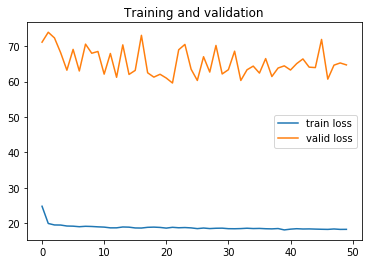

In [16]:
def visualize(data):
    visual_data = np.array(list(data.values()))
    ax = np.arange(len(data)) 
    y_train = visual_data[:, 0] 
    y_valid = visual_data[:, 1] 
    plt.plot(ax, y_train, label = 'train loss')
    plt.plot(ax, y_valid, label = 'valid loss')
    plt.title('Training and validation')
    plt.legend()
    plt.show()
    
visualize(visual_data)

### Full retraining and batch normalization

In [3]:
train_dir = 'train/'
valid_dir = 'valid/'

random_transforms = [transforms.RandomAffine(45), transforms.RandomHorizontalFlip(), transforms.RandomVerticalFlip()]
train_transforms = transforms.Compose([transforms.RandomRotation(90),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomChoice(random_transforms),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])
image_transforms = transforms.Compose([transforms.Resize(255),
                                       transforms.CenterCrop(224),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

In [4]:
batch_size = 64
num_workers = 0

train_dataset = datasets.ImageFolder(train_dir, transform = train_transforms)
valid_dataset = datasets.ImageFolder(valid_dir, transform = train_transforms)

trainloader = torch.utils.data.DataLoader(train_dataset, batch_size = batch_size, num_workers = num_workers, shuffle = True)
validloader = torch.utils.data.DataLoader(valid_dataset, batch_size = batch_size, num_workers = num_workers, shuffle = True)

loaders = {'train': trainloader, 'valid': validloader}

In [5]:
print(len(loaders['train']))
print(len(loaders['valid']))

18
2


In [6]:
use_cuda = torch.cuda.is_available()
classifier_batch_norm = nn.Sequential(OrderedDict([('fc1', nn.Linear(512, 1024)),
                                                   ('dropout1', nn.Dropout(p = 0.3)),
                                                   ('relu1', nn.ReLU()),
                                                   ('batchnorm1d_1', nn.BatchNorm1d(1024)),
                                                   ('fc2', nn.Linear(1024, 256)),
                                                   ('dropout2', nn.Dropout(p = 0.2)),
                                                   ('relu2', nn.ReLU()),
                                                   ('batchnorm1d_2', nn.BatchNorm1d(256)),
                                                   ('fc3', nn.Linear(256, 2)),
                                                   ('softmax', nn.LogSoftmax(dim = 1))]))
model_batch_norm = models.resnet18(pretrained = True)
model_batch_norm.fc = classifier_batch_norm
if use_cuda:
    print('GPU is available')
    model_batch_norm = model_batch_norm.cuda()
model_batch_norm

GPU is available


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [9]:
criterion = nn.NLLLoss()
optimizer = optim.SGD(model_batch_norm.fc.parameters(), lr = 0.02, momentum = 0.85)

In [10]:
trained_model_bn, visual_data_bn = train(500, loaders, model_batch_norm, optimizer, criterion, use_cuda, 'resnet18_pretrained_small.pt')

Epoch: 1	Training loss: 43.73008432653215	Validation loss: 36.104145526885986
Validation loss decreased (inf --> 36.104145526885986). Saving model...
Epoch: 2	Training loss: 41.77521474162737	Validation loss: 32.689712166786194
Validation loss decreased (36.104145526885986 --> 32.689712166786194). Saving model...
Epoch: 3	Training loss: 42.96314577592744	Validation loss: 35.70706033706665
Epoch: 4	Training loss: 41.80058001478513	Validation loss: 34.58632493019104
Epoch: 5	Training loss: 41.40738503800498	Validation loss: 34.606799840927124
Epoch: 6	Training loss: 38.92015880511867	Validation loss: 29.972862482070923
Validation loss decreased (32.689712166786194 --> 29.972862482070923). Saving model...
Epoch: 7	Training loss: 42.0761711233192	Validation loss: 33.38114523887634
Epoch: 8	Training loss: 39.74117430051168	Validation loss: 36.01392936706543
Epoch: 9	Training loss: 41.870576328701446	Validation loss: 38.379931688308716
Epoch: 10	Training loss: 41.03748780820105	Validation lo

Epoch: 101	Training loss: 38.49465477466583	Validation loss: 32.895946621894836
Epoch: 102	Training loss: 37.71703937649727	Validation loss: 32.04060411453247
Epoch: 103	Training loss: 38.19942479994562	Validation loss: 36.166749715805054
Epoch: 104	Training loss: 37.91838491294119	Validation loss: 32.59367775917053
Epoch: 105	Training loss: 36.268585589196945	Validation loss: 34.60520339012146
Epoch: 106	Training loss: 38.63686009579234	Validation loss: 32.94957685470581
Epoch: 107	Training loss: 37.5727467139562	Validation loss: 31.5712788105011
Epoch: 108	Training loss: 36.4739286104838	Validation loss: 34.537190675735474
Epoch: 109	Training loss: 37.5019332004918	Validation loss: 34.61814332008362
Epoch: 110	Training loss: 36.976592438088524	Validation loss: 37.096839427948
Epoch: 111	Training loss: 37.81690538260672	Validation loss: 32.72288131713867
Epoch: 112	Training loss: 37.95485246843762	Validation loss: 31.95231592655182
Epoch: 113	Training loss: 36.822825733158325	Validati

KeyboardInterrupt: 

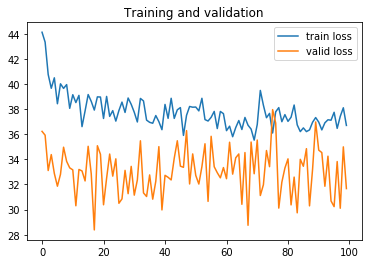

In [11]:
def visualize(data):
    visual_data = np.array(list(data.values()))
    ax = np.arange(len(data)) 
    y_train = visual_data[:, 0] 
    y_valid = visual_data[:, 1] 
    plt.plot(ax, y_train, label = 'train loss')
    plt.plot(ax, y_valid, label = 'valid loss')
    plt.title('Training and validation')
    plt.legend()
    plt.show()
    
visualize(visual_data_bn)

In [12]:
trained_model_bn.load_state_dict(torch.load('resnet18_pretrained_small.pt'))

<All keys matched successfully>

### Testing

In [39]:
classifier = nn.Sequential(OrderedDict([('fc1', nn.Linear(512, 1024)),
                                        ('dropout1', nn.Dropout(p = 0.3)),
                                        ('relu1', nn.ReLU()),
                                        ('fc2', nn.Linear(1024, 256)),
                                        ('dropout2', nn.Dropout(p = 0.2)),
                                        ('relu2', nn.ReLU()),
                                        ('fc3', nn.Linear(256, 2)),
                                        ('softmax', nn.LogSoftmax(dim = 1))]))
no_grad_model = models.resnet18(pretrained = True)
no_grad_model.fc = classifier
no_grad_model.load_state_dict(torch.load('resnet18_pretrained_small.pt'))

<All keys matched successfully>

In [11]:
classifier_batch_norm = nn.Sequential(OrderedDict([('fc1', nn.Linear(512, 1024)),
                                                   ('dropout1', nn.Dropout(p = 0.3)),
                                                   ('relu1', nn.ReLU()),
                                                   ('batchnorm1d_1', nn.BatchNorm1d(1024)),
                                                   ('fc2', nn.Linear(1024, 256)),
                                                   ('dropout2', nn.Dropout(p = 0.2)),
                                                   ('relu2', nn.ReLU()),
                                                   ('batchnorm1d_2', nn.BatchNorm1d(256)),
                                                   ('fc3', nn.Linear(256, 2)),
                                                   ('softmax', nn.LogSoftmax(dim = 1))]))
trained_model = models.resnet18(pretrained = True)
trained_model.fc = classifier_batch_norm
trained_model.load_state_dict(torch.load('resnet18_pretrained_small.pt'))

<All keys matched successfully>

In [12]:
train_dataset.classes
class_names = train_dataset.classes
class_names

['benign', 'malignant']

In [13]:
def model_predict(model, path):
    image = Image.open(path)
    resizing = transforms.Compose([transforms.Resize(255),
                                   transforms.CenterCrop(224),
                                   transforms.ToTensor(),
                                   transforms.Normalize([0.485, 0.456, 0.406],
                                                        [0.229, 0.224, 0.225])])
    resized_image = np.array(resizing(image))
    device = torch.device("cpu")
    model.to(device)
    model.eval()
    
    img_torch = torch.from_numpy(resized_image)
    img_torch = img_torch.unsqueeze_(0)
    img_torch = img_torch.float()
     
    output = model(img_torch)
    
    _, pred_tensor = torch.max(output, 1)
    pred_tensor = pred_tensor.to(torch.device("cpu"))
    pred = np.squeeze(pred_tensor.cpu().numpy())
    return pred

def prediction(trained_model, img_path):
    return class_names[model_predict(trained_model, img_path)]

In [14]:
print(prediction(trained_model, 'train/malignant/ISIC_0647450.jpg'))

benign


In [15]:
trained_model.class_to_idx = train_dataset.class_to_idx

def process_image(image):
    
    resizing = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])
    result = resizing(image)
    return np.array(result)

def predict(image_path, model, topk=2):
    
    device = torch.device("cpu")
    model.to(device)
    model.eval()
    
    img_open = Image.open(image_path) 
    img_processed = process_image(img_open)
    img_torch = torch.from_numpy(img_processed)
    
    img_torch = img_torch.unsqueeze_(0)
    img_torch = img_torch.float()
    
    with torch.no_grad():
        output = model.forward(img_torch)
        
    probability = F.softmax(output.data,dim=1)
    
    probs = np.array(probability.topk(topk)[0][0])
    
    index_to_class = {val: key for key, val in model.class_to_idx.items()}
    top_classes = [np.str(index_to_class[each]) for each in np.array(probability.topk(topk)[1][0])]
    
    return probs, top_classes

In [16]:
probs, classes = predict('train/malignant/ISIC_6945634.jpg', trained_model)
print(probs)
print(classes)

[0.94172853 0.05827143]
['malignant', 'benign']


In [18]:
probs, classes = predict('train/benign/ISIC_0015719.jpg', trained_model)
print(probs)
print(classes)

[0.9659078  0.03409219]
['benign', 'malignant']


In [22]:
probs[classes.index('malignant')]

0.034092188

In [29]:
import pandas as pd
columns = ['image_name', 'target']
submission = pd.DataFrame(columns = columns)
submission

,image_name,target


In [33]:
from pathlib import Path
for i, file in enumerate(Path('test').glob('ISIC_*.jpg')):
    probs, classes = predict('test/' + file.name, trained_model)
    submission.loc[i] = [file.name] + [probs[classes.index('malignant')]]

In [50]:
submission.head()

,image_name,target
0,ISIC_0052060,0.244821
1,ISIC_0052349,0.065359
2,ISIC_0058510,0.042783
3,ISIC_0073313,0.075240
4,ISIC_0073502,0.789269


In [52]:
submission.to_excel("submission.xlsx", index = False)

In [54]:
submission.to_csv('submission.csv', index = False)